# [ICTCOG AI Academy] 7기 고급시각저녁반
# CNN (2)

### 전통적인 NN 
- 1차원화
-  [특성 교차](https://developers.google.com/machine-learning/glossary?hl=ko)
  - feature 조합하여 새롭고 복잡한 특징 찾음 
  - 레이어가 깊어지면서 activation function으로 인해서 비선형성 증가
      - 데이터 공간 왜곡하여 분리 가능하도록 바뀜

### Convolution
- 1차로 바꾸지 않고 이미지를 convolution으로 변화를 시킴
  - 로컬 정보 유지
- 여러개 컨볼루션을 레이어 형태로 만들어 사용
- 레이어가 깊어질수록 더욱 더 추상적인 특징으로 변화됨 
- feature extraction이 잘 되면 classifier가 간단해질 수 있음
  - 업데이트 하여 가장 잘 분류할 수 있는 convolution 찾기 

### Convolution 문제점
- Convolution 단독으로 학습 어려움
- 학습한 이후에는 다른 알고리즘에 붙일 수 있음
- 컨볼루션 연산을 통해 변화한 값이 얼마만큼 정확한지 알아야함

#### CVPR 2012 Tutorial on DL part 3 :  NN for VISion 
> CNN0.pdf 참고
- End-to-emd recognition system  
  - 학습을 통해서 해결
  - Feature Extractor 
    - 함수형 패러다임: 딥러닝 모델의 핵심
  - Classifier 
    - NN :loss 최소화하도록 학습

######  Fully connected NN
- 2차 -> 1차원화 
  - 이미지 내 객체 위치에 민감
  - 공간적 의미를 잃음

###### Locally connected NN
- 주위의 weight만 구함
- 다른 필터 사용
- 공간적 특성을 갖음
- 연산 복잡도 높음

###### Convolutional Net
- 필터 공유 : ** 여러개의 필터들을 각각 전체 이미지 슬라이딩**해서 컨볼루션 연산
  - 파라미터 공유
- 연산 복잡도 LCNN보다 작음
- 공간적 특성을 갖음
- 위치에 민감하지 않음
  > Gradient-based learning applied to document recognition CNN

###### 컨볼루션 연산
-  상하좌우 반전  후 correlation 연산
  - 값이 커질려면 비슷할 수록 값이 커짐

###### pooling
- 축소하여 학습 cost 축소
- 연산복잡도 줄임
- 요즘은 사용하지 않기도 함
> - stride vs pooling



In [1]:
import tensorflow as tf

In [ ]:
tf.keras.layers.Dense               #fully connected

In [ ]:
tf.keras.layers.LocallyConnected2D  #locally connected  

In [2]:
tf.keras.layers.Convolution2D is tf.keras.layers.Conv2D #단축 표현 존재

True

datasets
- 데이터 형태 3차원
> 흑백 이미지 2차원 or 3차원, 컬러 이미지 3차원
  

In [6]:
#2차원 이미지 -> 3차원화 할 예정
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data()

In [7]:
X_train.shape # 2차원 이미지 6만개

(60000, 28, 28)

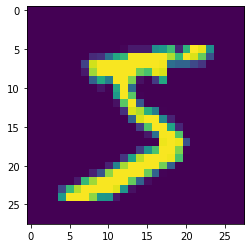

In [11]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])  #2차원은 컬러 정보가 없어서 다음과 같이 나옴.

In [12]:
X_train_3d= X_train.reshape(60000, 28,28,1) #3차원

이미지 데이터에는 3개의 채널이 아니기 때문에 matplotlib 에서는 불가

TypeError: ignored

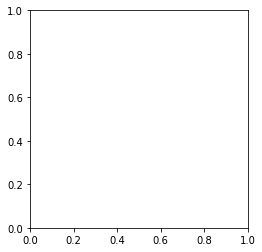

In [13]:
plt.imshow(X_train_3d[0])  

In [17]:
(X_train2,y_train2),(X_test2,y_test2)= tf.keras.datasets.cifar10.load_data()

In [18]:
X_train2[0].shape #cifar10  32x32 컬러이미지 

(32, 32, 3)

matplotlib 에서는 png 파일 잘 보이지 않음

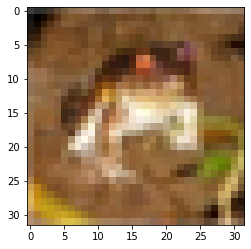

In [19]:
plt.imshow(X_train2[0])  

In [20]:
X_train2 #컬러이미지에서는 RGB로 색상 표현

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

convolution 은 3차원을 입력 받음

In [ ]:
X_train_3d = X_train.reshape(60000,28,28,1) #  하나의 intensity로 명암 보여줌

In [ ]:
tf.keras.layers.Con2D( units )  #이미지
tf.keras.layers.Conv3D #시간 + 이미지

#### Conv2D
> Arguments:
  - **filters**: Integer, the dimensionality of the output space (i.e. the number of
    output filters in the convolution).
  - **kernel_size**: An integer or tuple/list of 2 integers, specifying the height
    and width of the 2D convolution window. Can be a single integer to specify
    the same value for all spatial dimensions.
      > - filter size
  - **strides**: An integer or tuple/list of 2 integers, specifying the strides of
    the convolution along the height and width. Can be a single integer to
    specify the same value for all spatial dimensions. Specifying any stride
    value != 1 is incompatible with specifying any dilation_rate value != 1.
    > - 움직이는 크기
   -  padding: one of "valid" or "same" (case-insensitive).
    "valid" means no padding. "same" results in padding evenly to
    the left/right or up/down of the input such that output has the same
    height/width dimension as the input.
    > 크기 맞춰주기 위해서 자동으로 채워줌
  - data_format: A string, one of channels_last (default) or channels_first.
    The ordering of the dimensions in the inputs. channels_last corresponds
    to inputs with shape (batch_size, height, width, channels) while
    channels_first corresponds to inputs with shape (batch_size, channels,
    height, width). It defaults to the image_data_format value found in
    your Keras config file at ~/.keras/keras.json. If you never set it, then
    it will be channels_last.
    > - 데이터 구성 
      - channels_last (default) :(N,h,w,c)
        - Tensorflow.keras
      - channels_first  (N,c,h,w)
        - Thiano
        - > 이전에는 멀티 백엔드 지원
  - dilation_rate: an integer or tuple/list of 2 integers, specifying the
    dilation rate to use for dilated convolution. Can be a single integer to
    specify the same value for all spatial dimensions. Currently, specifying
    any dilation_rate value != 1 is incompatible with specifying any stride
    value != 1.
  - groups: A positive integer specifying the number of groups in which the
    input is split along the channel axis. Each group is convolved separately
    with filters / groups filters. The output is the concatenation of all
    the groups results along the channel axis. Input channels and filters
    must both be divisible by groups.
  activation: Activation function to use. If you don't specify anything, no
    activation is applied (see keras.activations).

In [ ]:
tf.keras.layers.Dense( ) #arguments 확인하기 

In [ ]:
tf.keras.layers.Conv2D(  )

In [25]:
inputs = tf.keras.Input(shape=(28,28,1)) # 3차원 
layers= tf.keras.layers.Conv2D( 1,2  ) #2x2 1개
outputs= layers(inputs)

In [26]:
model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

In [27]:
model.summary()  # valid 로 convolution 연산하면 크기가 줄어듦

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 1)         5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [28]:
inputs = tf.keras.Input(shape=(28,28,1)) # 3차원 
layers= tf.keras.layers.Conv2D( 1,(3,3)  ) #레이어에 3x3 1개
outputs= layers(inputs)
model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
model.summary()  #kernelsize가 3x3되면서 결과가 26으로 줄어듦

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 1)         10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


parameter  3x3 kernel + 1 bias 

In [29]:
inputs = tf.keras.Input(shape=(28,28,1)) # 3차원 
layers= tf.keras.layers.Conv2D( 2,(2,2)  ) #레이어에 2x2 2개
outputs= layers(inputs)
model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 27, 27, 2)         10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


parameter 2x2 kernel x2개 +2 bias 


In [31]:
inputs = tf.keras.Input(shape=(28,28,1)) # 3차원 
layers= tf.keras.layers.Conv2D( 4,(3,3) ,use_bias= False ) #레이어에 2x2 2개
outputs= layers(inputs)
model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 4)         36        
Total params: 36
Trainable params: 36
Non-trainable params: 0
_________________________________________________________________


parameter 3x3 kernel x4개 


In [32]:
layers.weights #kernel shape=(3, 3, 1, 4) 3x3x1 4개, bias 없음

[<tf.Variable 'conv2d_5/kernel:0' shape=(3, 3, 1, 4) dtype=float32, numpy=
 array([[[[-0.09836125, -0.09701726,  0.12887776, -0.27586856]],
 
         [[ 0.14338702, -0.28301734, -0.13560039,  0.21651155]],
 
         [[-0.01443207,  0.13979852,  0.33850718, -0.05551517]]],
 
 
        [[[ 0.15065163,  0.12484401,  0.25973088, -0.31067076]],
 
         [[ 0.12343192,  0.06868854, -0.02863333, -0.30225006]],
 
         [[ 0.09495109,  0.30251545,  0.01137719, -0.26945457]]],
 
 
        [[[-0.23236257,  0.16620106, -0.36194244,  0.1349746 ]],
 
         [[-0.12972353,  0.31904674, -0.14753711,  0.22487104]],
 
         [[-0.12523325,  0.02172282, -0.25210518,  0.34248888]]]],
       dtype=float32)>]

In [35]:
len(layers.weights)

1

##### bias
- perceptron $WX +b$
  - bias: NN에 활성화 정도 (모델에 유연성 제공)
  > overfitting : bias-variance 의 bias 와는 다름 
    - bias : 실제값과 예측값 차이  
    - variance : 분산 

In [37]:
layers= tf.keras.layers.Conv2D( 4,(3,3) ,use_bias= True ) 
layers.weights  #모델 생성 전에는 kernel, bias

[]

In [38]:
inputs = tf.keras.Input(shape=(28,28,1)) # 3차원 
layers= tf.keras.layers.Conv2D( 4,(3,3) ,use_bias= True ) #레이어에 2x2 2개
outputs= layers(inputs)
model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 26, 26, 4)         40        
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


In [39]:
layers.weights  # 모델 생성 후에는 3x3x1 kernel, bias 생성

[<tf.Variable 'conv2d_8/kernel:0' shape=(3, 3, 1, 4) dtype=float32, numpy=
 array([[[[-0.19614942,  0.11839777, -0.11283642, -0.20696205]],
 
         [[ 0.06108794,  0.24794382,  0.19058508, -0.07985547]],
 
         [[-0.02329433,  0.11689952,  0.3387723 ,  0.34276712]]],
 
 
        [[[ 0.18726647,  0.04223931, -0.3590563 ,  0.07466507]],
 
         [[ 0.30039358,  0.23058963,  0.27647156,  0.22428042]],
 
         [[-0.3441441 ,  0.12565497,  0.3163579 , -0.32999873]]],
 
 
        [[[ 0.14878458,  0.29201192, -0.28281835,  0.02798676]],
 
         [[ 0.27052087, -0.01198766, -0.01205528,  0.3395927 ]],
 
         [[-0.0459277 , -0.06331113, -0.05133018,  0.2633053 ]]]],
       dtype=float32)>,
 <tf.Variable 'conv2d_8/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>]

In [40]:
len(layers.weights) #2개 kernel & bias로 이루어짐 

2

In [42]:
layers.weights[0] #kernel

<tf.Variable 'conv2d_8/kernel:0' shape=(3, 3, 1, 4) dtype=float32, numpy=
array([[[[-0.19614942,  0.11839777, -0.11283642, -0.20696205]],

        [[ 0.06108794,  0.24794382,  0.19058508, -0.07985547]],

        [[-0.02329433,  0.11689952,  0.3387723 ,  0.34276712]]],


       [[[ 0.18726647,  0.04223931, -0.3590563 ,  0.07466507]],

        [[ 0.30039358,  0.23058963,  0.27647156,  0.22428042]],

        [[-0.3441441 ,  0.12565497,  0.3163579 , -0.32999873]]],


       [[[ 0.14878458,  0.29201192, -0.28281835,  0.02798676]],

        [[ 0.27052087, -0.01198766, -0.01205528,  0.3395927 ]],

        [[-0.0459277 , -0.06331113, -0.05133018,  0.2633053 ]]]],
      dtype=float32)>

In [65]:
layers.kernel

<tf.Variable 'conv2d_8/kernel:0' shape=(3, 3, 1, 4) dtype=float32, numpy=
array([[[[-0.19614942,  0.11839777, -0.11283642, -0.20696205]],

        [[ 0.06108794,  0.24794382,  0.19058508, -0.07985547]],

        [[-0.02329433,  0.11689952,  0.3387723 ,  0.34276712]]],


       [[[ 0.18726647,  0.04223931, -0.3590563 ,  0.07466507]],

        [[ 0.30039358,  0.23058963,  0.27647156,  0.22428042]],

        [[-0.3441441 ,  0.12565497,  0.3163579 , -0.32999873]]],


       [[[ 0.14878458,  0.29201192, -0.28281835,  0.02798676]],

        [[ 0.27052087, -0.01198766, -0.01205528,  0.3395927 ]],

        [[-0.0459277 , -0.06331113, -0.05133018,  0.2633053 ]]]],
      dtype=float32)>

In [68]:
layers.weights[1] 

<tf.Variable 'conv2d_8/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>

In [69]:
layers.bias

<tf.Variable 'conv2d_8/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>

In [45]:
layers.weights[0][...,-1]  # 초기화된 커널

<tf.Tensor: shape=(3, 3, 1), dtype=float32, numpy=
array([[[-0.20696205],
        [-0.07985547],
        [ 0.34276712]],

       [[ 0.07466507],
        [ 0.22428042],
        [-0.32999873]],

       [[ 0.02798676],
        [ 0.3395927 ],
        [ 0.2633053 ]]], dtype=float32)>

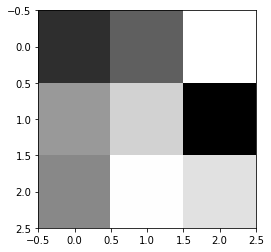

In [47]:
#초기화된 커널 시각화
plt.imshow(layers.weights[0][...,-1] .numpy().reshape(3,3),cmap='gray')

In [49]:
X_train_3d[0].shape  #3차원에서 batch 크기도 맞춰줘야함

(28, 28, 1)

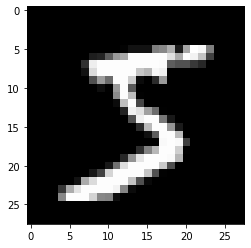

In [52]:
plt.imshow(X_train_3d[0].reshape(28,28),cmap='gray') 

In [53]:
#함수형 패러다임
eg = model(X_train_3d[0][tf.newaxis] ) #이미지를 넣으면 위의 초기화된 kernel과 곱해져서 값이 나옴

In [54]:
eg #26x26 4개

<tf.Tensor: shape=(1, 26, 26, 4), dtype=float32, numpy=
array([[[[  0.       ,   0.       ,   0.       ,   0.       ],
         [  0.       ,   0.       ,   0.       ,   0.       ],
         [  0.       ,   0.       ,   0.       ,   0.       ],
         ...,
         [  0.       ,   0.       ,   0.       ,   0.       ],
         [  0.       ,   0.       ,   0.       ,   0.       ],
         [  0.       ,   0.       ,   0.       ,   0.       ]],

        [[  0.       ,   0.       ,   0.       ,   0.       ],
         [  0.       ,   0.       ,   0.       ,   0.       ],
         [  0.       ,   0.       ,   0.       ,   0.       ],
         ...,
         [  0.       ,   0.       ,   0.       ,   0.       ],
         [  0.       ,   0.       ,   0.       ,   0.       ],
         [  0.       ,   0.       ,   0.       ,   0.       ]],

        [[  0.       ,   0.       ,   0.       ,   0.       ],
         [  0.       ,   0.       ,   0.       ,   0.       ],
         [  0.       ,   0.   

In [56]:
eg[0][...,0] #컨볼루션에 곱해서 나온 결과

<tf.Tensor: shape=(26, 26), dtype=float32, numpy=
array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+0

In [60]:
eg[0].shape

TensorShape([26, 26, 4])

0번째 필터와 이미지가 곱해질 결과

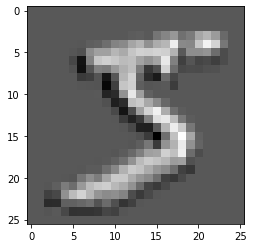

In [58]:
plt.imshow(eg[0][...,0],cmap='gray') #통과해서 바뀐 이미지

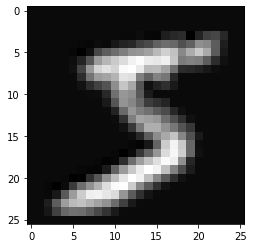

In [61]:
plt.imshow(eg[0][...,1],cmap='gray')

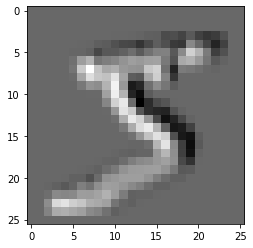

In [62]:
plt.imshow(eg[0][...,2],cmap='gray') 

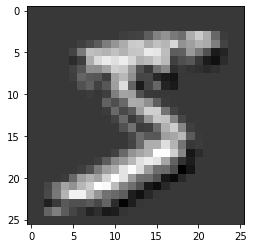

In [63]:
plt.imshow(eg[0][...,3],cmap='gray')   #각 커널별로 이미지 변한

- 32개의 3x3 필터
- Feature Extraction: 학습을 통해서 0-9를 가장 잘 구분하는 특성/kernel 을 추출
> CNN 모델들을 논문을 통해 학습할 예정


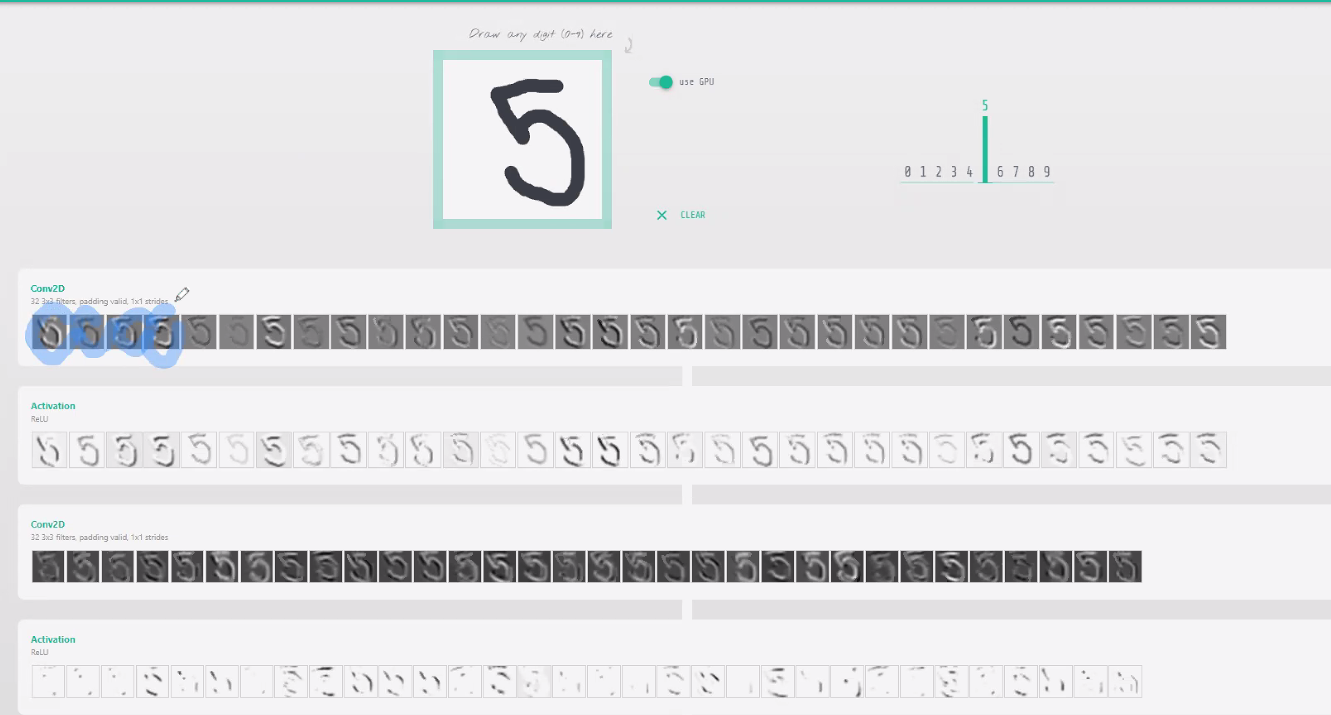

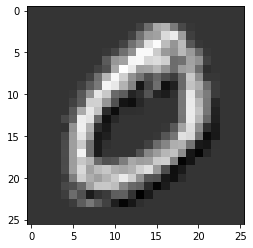

In [71]:
eg = model(X_train_3d[1][tf.newaxis] ) #1번째 데이터를 모델에 넣었음
plt.imshow(eg[0][...,3],cmap='gray')   #4번째 필터 사용

아직은 큰 차이는 없으나 눈에 띄는건 색상 차이 정도

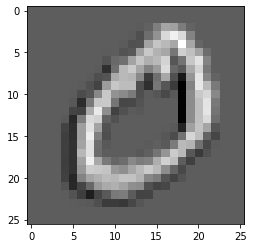

In [74]:
plt.imshow(eg[0][...,0],cmap='gray')

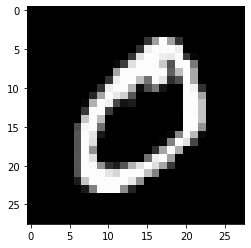

In [77]:
plt.imshow(X_train[1],cmap='gray') #원본 이미지와의 차이 

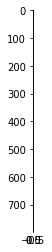

In [81]:
#1차원화 시각화
plt.imshow(X_train_3d[0].reshape(28*28,1))